# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-91.000, high=91.000, size=1500)
lngs = np.random.uniform(low=-179.000, high=179.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:


# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create lists 
date = []
wind_speed = []
temp = []
temp_max = []
humidity = []
lon = []
lat = []
country = []
cloudiness = []


# creating a for loop that will pull thru all the data and create a request
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
   
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
              
 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | santa elena de uairen
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | mehtar lam
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | kamaishi
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | baglung
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | bi

Processing Record 35 of Set 4 | kalemie
Processing Record 36 of Set 4 | howard springs
Processing Record 37 of Set 4 | mount isa
Processing Record 38 of Set 4 | mhangura
Processing Record 39 of Set 4 | susuman
Processing Record 40 of Set 4 | dudinka
Processing Record 41 of Set 4 | taksimo
Processing Record 42 of Set 4 | planaltina
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | el hatillo
Processing Record 45 of Set 4 | sao joao dos inhamuns
Processing Record 46 of Set 4 | bejaia
Processing Record 47 of Set 4 | san ignacio
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | cheremukhovo
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | sfizef
Processing Record 2 of Set 5 | altai
Processing Record 3 of Set 5 | kalmunai
Processing Record 4 of Set 5 | kuqa
Processing Record 5 of Set 5 | yangambi
Processing Record 6 of Set 5 | huarmey
Processing Record 7 of Set 5 | kolonia
Processing Record 8 of Set 5 | rio grande
Processing 

Processing Record 30 of Set 8 | walvis bay
Processing Record 31 of Set 8 | lorengau
Processing Record 32 of Set 8 | manacapuru
Processing Record 33 of Set 8 | bireun
Processing Record 34 of Set 8 | mushie
Processing Record 35 of Set 8 | tanout
Processing Record 36 of Set 8 | boende
Processing Record 37 of Set 8 | dobrinka
Processing Record 38 of Set 8 | filipstad
Processing Record 39 of Set 8 | santyoku
Processing Record 40 of Set 8 | san matias
Processing Record 41 of Set 8 | maya
Processing Record 42 of Set 8 | bairnsdale
Processing Record 43 of Set 8 | sao joao da barra
Processing Record 44 of Set 8 | burang
Processing Record 45 of Set 8 | correntina
Processing Record 46 of Set 8 | chuhar jamali
Processing Record 47 of Set 8 | lubang
Processing Record 48 of Set 8 | tindouf
Processing Record 49 of Set 8 | bargara
City not found. Skipping...
Processing Record 50 of Set 8 | kaura namoda
Processing Record 1 of Set 9 | novyy urgal
Processing Record 2 of Set 9 | malabrigo
Processing Recor

Processing Record 19 of Set 12 | sabha
Processing Record 20 of Set 12 | karibib
Processing Record 21 of Set 12 | bonny
Processing Record 22 of Set 12 | gosaba
City not found. Skipping...
Processing Record 23 of Set 12 | miyaly
Processing Record 24 of Set 12 | brisas de zicatela
Processing Record 25 of Set 12 | punta del este
Processing Record 26 of Set 12 | port blair
Processing Record 27 of Set 12 | xianning
Processing Record 28 of Set 12 | pokrovsk
Processing Record 29 of Set 12 | kavieng
Processing Record 30 of Set 12 | medvezh'yegorsk
Processing Record 31 of Set 12 | jiagedaqi
Processing Record 32 of Set 12 | tambopata
Processing Record 33 of Set 12 | bel ombre
Processing Record 34 of Set 12 | svetlyy
Processing Record 35 of Set 12 | center
Processing Record 36 of Set 12 | eyl
Processing Record 37 of Set 12 | tsumeb
Processing Record 38 of Set 12 | nagqu
Processing Record 39 of Set 12 | mablethorpe
City not found. Skipping...
Processing Record 40 of Set 12 | usogorsk
Processing Rec

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
})

# Show Record Count
city_data_df.count()

City          626
Cloudiness    590
Country       590
Date          590
Humidity      590
Latitude      590
Longitude     590
Max Temp      590
Wind Speed    590
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,blackmans bay,38.0,AU,1.701886e+09,78.0,-43.0167,147.3167,11.07,2.45
2,ushuaia,62.0,AR,1.701886e+09,61.0,-54.8000,-68.3000,10.79,3.68
3,puerto natales,40.0,CL,1.701886e+09,44.0,-51.7236,-72.4875,13.25,9.26
4,port-aux-francais,100.0,TF,1.701886e+09,83.0,-49.3500,70.2167,5.14,9.23


In [21]:
# Export the City_Data into a csv
import os 
output_data_dir = "Output_Data"
os.makedirs(output_data_dir, exist_ok=True)
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,blackmans bay,38.0,AU,1.701886e+09,78.0,-43.0167,147.3167,11.07,2.45
2,ushuaia,62.0,AR,1.701886e+09,61.0,-54.8000,-68.3000,10.79,3.68
3,puerto natales,40.0,CL,1.701886e+09,44.0,-51.7236,-72.4875,13.25,9.26
4,port-aux-francais,100.0,TF,1.701886e+09,83.0,-49.3500,70.2167,5.14,9.23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

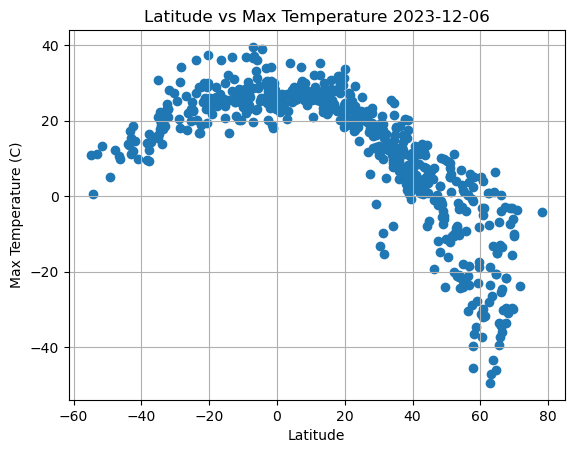

In [31]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Latitude']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
data_date = datetime.date(datetime.now())
plt.title(f"City Latitude vs Max Temperature {data_date}")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

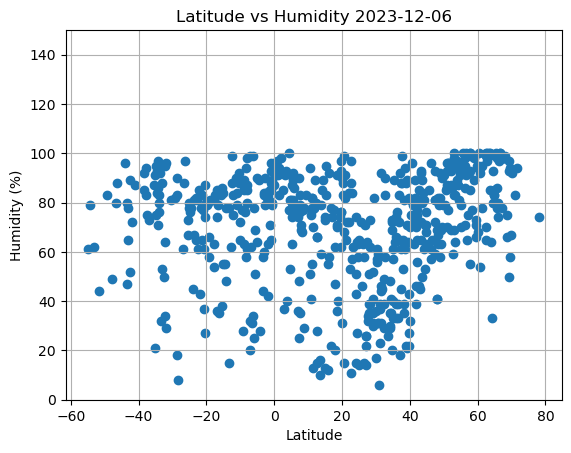

In [36]:

# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Latitude']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.ylim(0, 150)
data_date = datetime.date(datetime.now())
plt.title(f" City Latitude vs Humidity {data_date}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

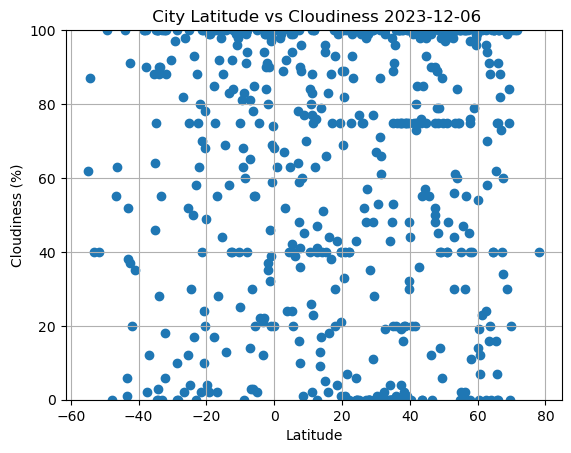

In [38]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Latitude']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.ylim(0, 100)
data_date = datetime.date(datetime.now())
plt.title(f" City Latitude vs Cloudiness {data_date}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

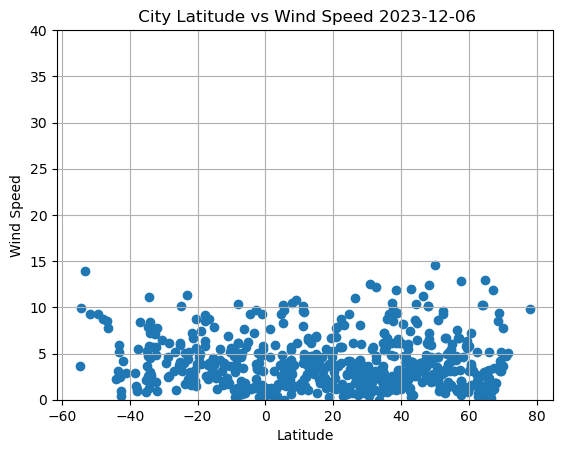

In [40]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Latitude']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.ylim(0, 40)
data_date = datetime.date(datetime.now())
plt.title(f" City Latitude vs Wind Speed {data_date}")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
import seaborn as sns
from scipy.stats import linregress
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    sns.regplot(x=x_values, y=y_values, line_kws={'color': 'red'}, ci=None if pvalue >= 0.05 else 95)

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
City_ID,,,,,,,,,
5,santa elena de uairen,63.0,VE,1.701886e+09,53.0,4.6167,-61.1333,26.88,2.62
7,mehtar lam,0.0,AF,1.701886e+09,20.0,34.6714,70.2094,12.84,1.60
8,albany,100.0,US,1.701886e+09,85.0,42.6001,-73.9662,0.91,0.89
12,iqaluit,20.0,CA,1.701886e+09,85.0,63.7506,-68.5145,-13.15,2.57
13,laguna,20.0,US,1.701886e+09,81.0,38.4210,-121.4238,15.30,6.17


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
City_ID,,,,,,,,,
1,blackmans bay,38.0,AU,1.701886e+09,78.0,-43.0167,147.3167,11.07,2.45
2,ushuaia,62.0,AR,1.701886e+09,61.0,-54.8000,-68.3000,10.79,3.68
3,puerto natales,40.0,CL,1.701886e+09,44.0,-51.7236,-72.4875,13.25,9.26
4,port-aux-francais,100.0,TF,1.701886e+09,83.0,-49.3500,70.2167,5.14,9.23
6,margaret river,28.0,AU,1.701886e+09,83.0,-33.9500,115.0667,13.84,4.51


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs Max Temp (C) 2023-12-06')

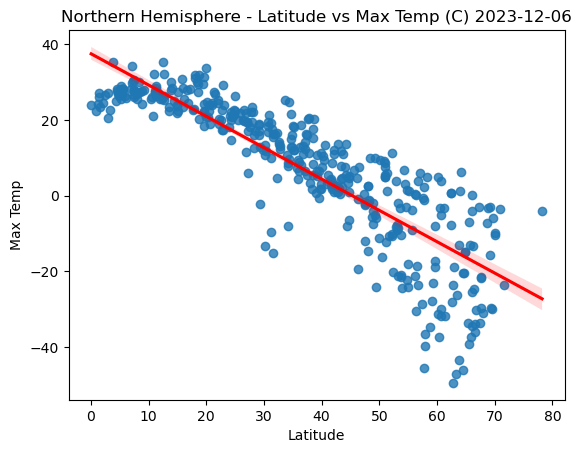

In [65]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Latitude']
y = northern_hemi_df['Max Temp']
create_linear_regression_plot(x, y, "Latitude", "Max Temp (C)", "Northern")
plt.title(f"Northern Hemisphere - Latitude vs Max Temp (C) {data_date}")

Text(0.5, 1.0, 'Southern Hemisphere - Latitude vs Max Temp (C) 2023-12-06')

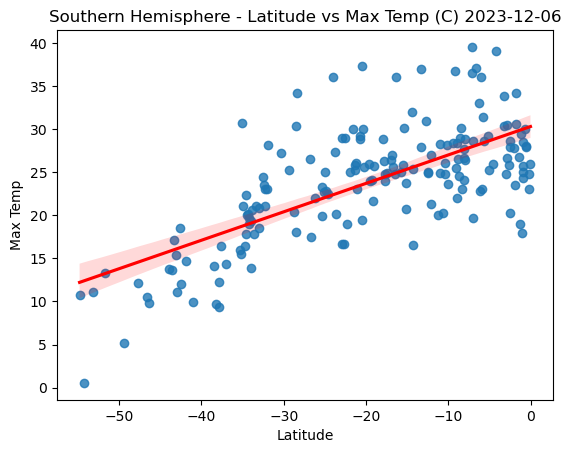

In [66]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Latitude']
y = southern_hemi_df['Max Temp']
create_linear_regression_plot(x, y, "Latitude", "Max Temp (C)", "Southern")
plt.title(f"Southern Hemisphere - Latitude vs Max Temp (C) {data_date}")

**Discussion about the linear relationship:** In the northern hemisphere, the analysis shows that as you move away from the equator, the temperature decreases consistently. In the southern hemisphere, moving closer to the equator results in a slight temperature increase, while moving away sees a small temperature decrease. The patterns are shown by gentle slopes in the regression lines.

### Humidity vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs Humidity (C) 2023-12-06')

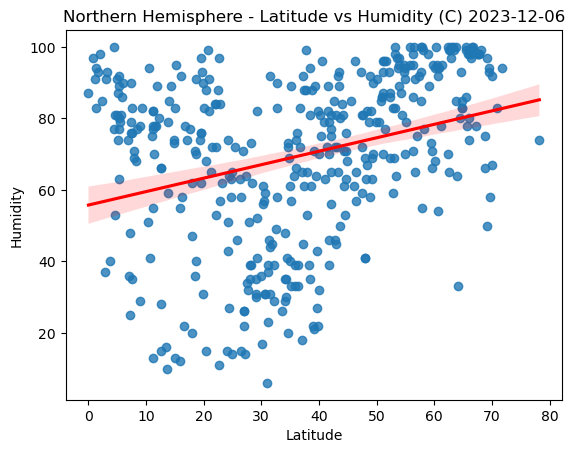

In [67]:
# Northern Hemisphere
x = northern_hemi_df['Latitude']
y = northern_hemi_df['Humidity']
create_linear_regression_plot(x, y, "Latitude", "Humidity (%)", "Northern")
plt.title(f"Northern Hemisphere - Latitude vs Humidity (%) {data_date}")

Text(0.5, 1.0, 'Southern Hemisphere - Latitude vs Humidity (C) 2023-12-06')

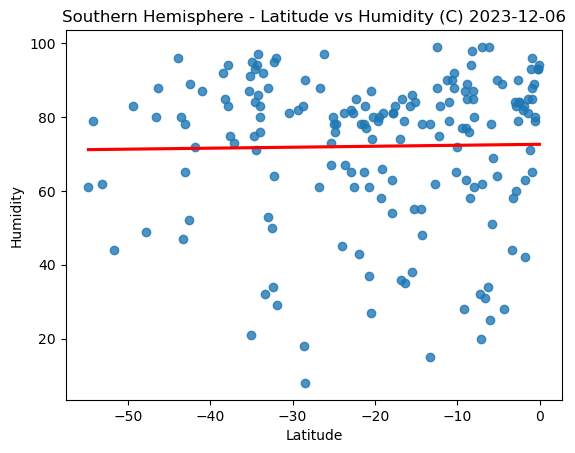

In [68]:
# Southern Hemisphere
x = southern_hemi_df['Latitude']
y = southern_hemi_df['Humidity']
create_linear_regression_plot(x, y, "Latitude", "Humidity (%)", "Southern")
plt.title(f"Southern Hemisphere - Latitude vs Humidity (%) {data_date}")

**Discussion about the linear relationship:** In the northern hemisphere, humidity shows a slight increase as you move away from the equator, with a small slope in the regression line indicating the modest rise. Similarly, approaching the equator results in a minor decrease in humidity. In the southern hemisphere, there's a slight uptick in humidity as you get closer to the equator, and a small decline as you move away, suggesting latitude has a limited impact on humidity in this region.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs Cloudiness (C) 2023-12-06')

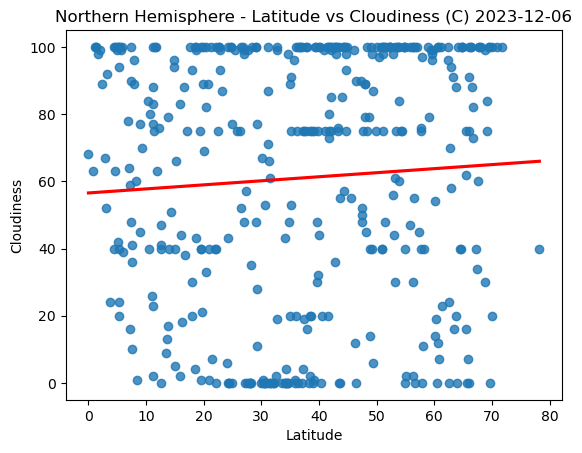

In [69]:
# Northern Hemisphere
x = northern_hemi_df['Latitude']
y = northern_hemi_df['Cloudiness']
create_linear_regression_plot(x, y, "Latitude", "Cloudiness (C)", "Northern")
plt.title(f"Northern Hemisphere - Latitude vs Cloudiness (C) {data_date}")

Text(0.5, 1.0, 'Southern Hemisphere - Latitude vs Cloudiness (%) 2023-12-06')

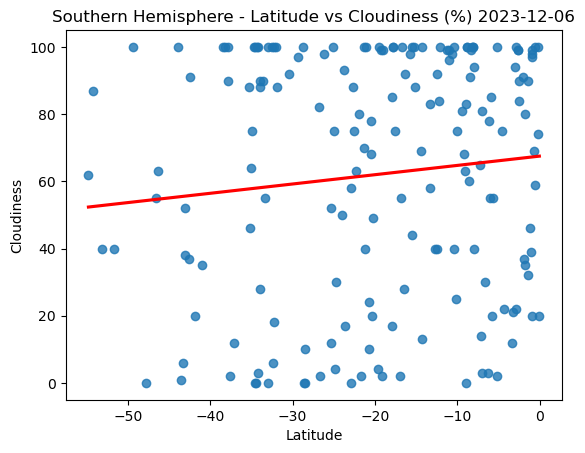

In [70]:
# Southern Hemisphere
x = southern_hemi_df['Latitude']
y = southern_hemi_df['Cloudiness']
create_linear_regression_plot(x, y, "Latitude", "Cloudiness (%)", "Southern")
plt.title(f"Southern Hemisphere - Latitude vs Cloudiness (%) {data_date}")

**Discussion about the linear relationship:** In the northern hemisphere, the linear regression indicates a very weak or possibly no correlation between latitude and cloudiness. Whether moving away from or closer to the equator, latitude does not significantly impact cloudiness, as seen in the scattered data points. Conversely, in the southern hemisphere, there is a weak positive correlation between latitude and cloudiness, though the influence is limited. It's noteworthy that the correlation is somewhat stronger in the southern hemisphere compared to the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs Wind Speed (mph) 2023-12-06')

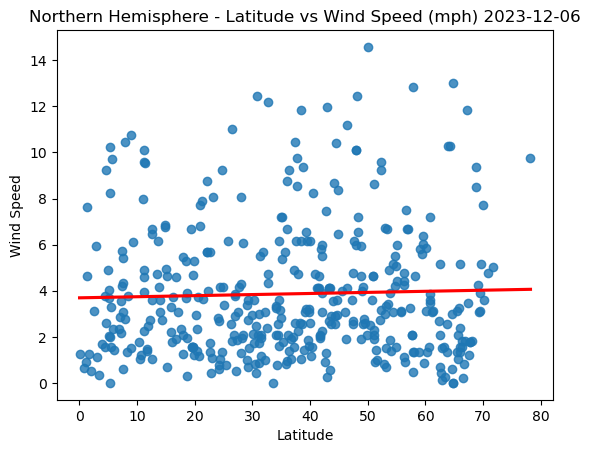

In [71]:
# Northern Hemisphere
x = northern_hemi_df['Latitude']
y = northern_hemi_df['Wind Speed']
create_linear_regression_plot(x, y, "Latitude", "Wind Speed (mph)", "Northern")
plt.title(f"Northern Hemisphere - Latitude vs Wind Speed (mph) {data_date}")

Text(0.5, 1.0, 'Southern Hemisphere - Latitude vs Wind Speed (mph) 2023-12-06')

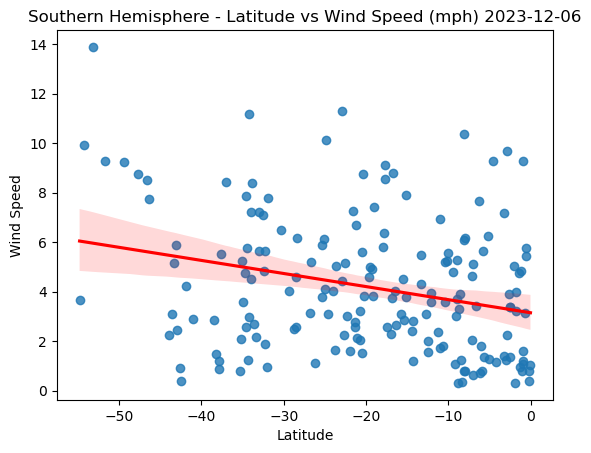

In [72]:
# Southern Hemisphere
x = southern_hemi_df['Latitude']
y = southern_hemi_df['Wind Speed']
create_linear_regression_plot(x, y, "Latitude", "Wind Speed (mph)", "Northern")
plt.title(f"Southern Hemisphere - Latitude vs Wind Speed (mph) {data_date}")

**Discussion about the linear relationship:** 
In the northern hemisphere, the linear regression suggests a very weak to almost no correlation between wind speed and latitude. Whether moving farther north or towards the equator, latitude seems to have minimal impact on city wind speeds, as indicated by the scattered data points. Notably, both cities near and far from the equator generally exhibit lower wind speeds. In the southern hemisphere, there is a weak negative correlation between wind speed and latitude, with slightly increased speeds moving farther south and slightly decreased speeds moving towards the equator. Although latitude has a modest influence on wind speed, the correlation is stronger in the southern hemisphere compared to the northern hemisphere.